In [1]:
#Import pandas for data management and matplotlib for graphics.
#Importamos pandas para el manejo de datos y matplotlib para las graficas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
#Import data from a csv file into a dataframe.
#Importamos los datos desde un csv a un dataframe.
df_tortillas = pd.read_csv("tortilla_prices.csv")

In [3]:
#Check the first five records to make sure everything it's ok.
#Revisamos los primeros cinco registros para ver que todo esta bien.
df_tortillas.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


In [4]:
#Now check the last five records.
#Ahora chequemos los ultimos cinco registros.
df_tortillas.tail()

,State,City,Year,Month,Day,Store type,Price per kilogram
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40
284393,Zacatecas,Zacatecas,2024,7,8,Big Retail Store,13.53


In [5]:
#Now see how many records each colunm has.
#Ahora veamos que tantos registros tiene cada columna.
df_tortillas.count()

State                 284394
City                  284394
Year                  284394
Month                 284394
Day                   284394
Store type            284394
Price per kilogram    278004
dtype: int64

In [6]:
#There's a column that has fewer records than the others, let's see the difference.
#Hay una columna que tiene menos registros que las otras, veamos la diferencia.
df_tortillas["State"].count()-df_tortillas["Price per kilogram"].count()

6390

In [7]:
#Let's fill all the NaN values with a monthly average.
#Llenemos todos los valores NaN con promedios mensuales.
df_tortillas.groupby(["State","Year","Month","Store type"])["Price per kilogram"].mean().round(2)

State           Year  Month  Store type       
Aguascalientes  2007  1      Big Retail Store      5.81
                             Mom and Pop Store     9.86
                      2      Big Retail Store      5.77
                             Mom and Pop Store     9.80
                      3      Big Retail Store      5.77
                                                  ...  
Zacatecas       2024  5      Mom and Pop Store    22.00
                      6      Big Retail Store     13.76
                             Mom and Pop Store    22.00
                      7      Big Retail Store     13.53
                             Mom and Pop Store    22.00
Name: Price per kilogram, Length: 13504, dtype: float64

In [8]:
#We created a DataFrame where the data is grouped by month for greater precision.
#Creamos un DF donde la inforacion esta agrupada por mes para mayor precision.
promedio_precios=df_tortillas.groupby(["State", "Year", "Month", "Store type"])["Price per kilogram"].mean().round(2).reset_index()

In [9]:
promedio_precios

,State,Year,Month,Store type,Price per kilogram
0,Aguascalientes,2007,1,Big Retail Store,5.81
1,Aguascalientes,2007,1,Mom and Pop Store,9.86
2,Aguascalientes,2007,2,Big Retail Store,5.77
3,Aguascalientes,2007,2,Mom and Pop Store,9.80
4,Aguascalientes,2007,3,Big Retail Store,5.77
...,...,...,...,...,...
13499,Zacatecas,2024,5,Mom and Pop Store,22.00
13500,Zacatecas,2024,6,Big Retail Store,13.76
13501,Zacatecas,2024,6,Mom and Pop Store,22.00
13502,Zacatecas,2024,7,Big Retail Store,13.53


In [10]:
promedio_precios['State'].unique()

array(['Aguascalientes', 'Baja\xa0California',
       'Baja\xa0California\xa0Sur', 'Campeche', 'Chiapas', 'Chihuahua',
       'Coahuila', 'Colima', 'D.F.', 'Durango', 'Edo.\xa0México',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán',
       'Morelos', 'Nayarit', 'Nuevo\xa0León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana\xa0Roo', 'San\xa0Luis\xa0Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz',
       'Yucatán', 'Zacatecas'], dtype=object)

In [11]:
#Turn the DF into a dictionary
#Comvertimos el DF a un diccionario
promedio_dict = promedio_precios.set_index(["State", "Year", "Month", "Store type"])["Price per kilogram"].to_dict()
#promedio_dict

In [12]:
#We'll use a function
#Vamos a usar una funcion
def rellenar_precio(row):
    #This line checks if there is any missing data ('NaN') in the 'Price per kilogram' row.
    #Esta linea checa si es que hay algun dato no capturado ('NaN') en la columna 'Price per kilogram'.
    if pd.isna(row["Price per kilogram"]):
        #If there's a NaN, this line looks for a price based on the dictionary we created.
        #Si hay un NaN, esta linea busca por un precio basado en el diccionario que creamos.
        return promedio_dict.get((row["State"], row["Year"], row["Month"], row["Store type"]), row["Price per kilogram"])
    #If there's no NaN, this line return the original price.
    #Si no hay NaN, esta linea regresa el precio original.
    return row["Price per kilogram"]
#Here we apply the function to the DF.
#Aqui aplicamos la funcion al DF.
df_tortillas["Price per kilogram"] = df_tortillas.apply(rellenar_precio, axis=1)

In [13]:
#Now it's already done.
#Ahora ya esta hecho.
df_tortillas

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,10.61
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
...,...,...,...,...,...,...,...
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40


In [14]:
#Well... actually no, there are still some missing prices.
#Bueno... de hecho no, ahi siguen algunos precios perdidos.
df_tortillas[df_tortillas['Price per kilogram'].isna()]

,State,City,Year,Month,Day,Store type,Price per kilogram
199951,San Luis Potosí,San Luis Potosí,2019,6,3,Mom and Pop Store,NaN
199956,Tabasco,Villahermosa,2019,6,3,Mom and Pop Store,NaN
200005,San Luis Potosí,San Luis Potosí,2019,6,5,Mom and Pop Store,NaN
200010,Tabasco,Villahermosa,2019,6,5,Mom and Pop Store,NaN
200059,San Luis Potosí,San Luis Potosí,2019,6,7,Mom and Pop Store,NaN
...,...,...,...,...,...,...,...
237324,Guerrero,Chilpancingo,2021,2,24,Big Retail Store,NaN
237374,Guanajuato,Celaya,2021,2,26,Big Retail Store,NaN
237375,Guanajuato,León,2021,2,26,Big Retail Store,NaN
237376,Guerrero,Acapulco,2021,2,26,Big Retail Store,NaN


In [15]:
df_tortillas[(df_tortillas['Year']==2019)&(df_tortillas['Month']==6)&(df_tortillas['State']=='San\xa0Luis\xa0Potosí')]

,State,City,Year,Month,Day,Store type,Price per kilogram
199951,San Luis Potosí,San Luis Potosí,2019,6,3,Mom and Pop Store,NaN
200005,San Luis Potosí,San Luis Potosí,2019,6,5,Mom and Pop Store,NaN
200059,San Luis Potosí,San Luis Potosí,2019,6,7,Mom and Pop Store,NaN
200113,San Luis Potosí,San Luis Potosí,2019,6,10,Mom and Pop Store,NaN
200167,San Luis Potosí,San Luis Potosí,2019,6,12,Mom and Pop Store,NaN
200221,San Luis Potosí,San Luis Potosí,2019,6,14,Mom and Pop Store,NaN
200275,San Luis Potosí,San Luis Potosí,2019,6,17,Mom and Pop Store,NaN
200329,San Luis Potosí,San Luis Potosí,2019,6,19,Mom and Pop Store,NaN
200383,San Luis Potosí,San Luis Potosí,2019,6,21,Mom and Pop Store,NaN
200437,San Luis Potosí,San Luis Potosí,2019,6,24,Mom and Pop Store,NaN


In [16]:
promedio_dict['San\xa0Luis\xa0Potosí', 2019, 6, 'Big Retail Store']

nan

In [17]:
promedio_dict['San\xa0Luis\xa0Potosí', 2019, 6, 'Mom and Pop Store']

nan

In [18]:
#Let's fill in the remaining data using the same process, but this time based on the year.
#LLenemos los datos restantes con el mismo proceso, pero esta vez basado en el año.
promedio_precios=df_tortillas.groupby(["State", "Year", "Store type"])["Price per kilogram"].mean().round(2).reset_index()

In [19]:
promedio_precios

,State,Year,Store type,Price per kilogram
0,Aguascalientes,2007,Big Retail Store,5.77
1,Aguascalientes,2007,Mom and Pop Store,9.66
2,Aguascalientes,2008,Big Retail Store,5.76
3,Aguascalientes,2008,Mom and Pop Store,9.77
4,Aguascalientes,2009,Big Retail Store,5.81
...,...,...,...,...
1147,Zacatecas,2022,Mom and Pop Store,18.64
1148,Zacatecas,2023,Big Retail Store,13.54
1149,Zacatecas,2023,Mom and Pop Store,20.71
1150,Zacatecas,2024,Big Retail Store,13.55


In [20]:
promedio_dict = promedio_precios.set_index(["State", "Year", "Store type"])["Price per kilogram"].to_dict()

In [21]:
def rellenar_precio(row):
    if pd.isna(row["Price per kilogram"]):
        return promedio_dict.get((row["State"], row["Year"], row["Store type"]), row["Price per kilogram"])
    return row["Price per kilogram"]

df_tortillas["Price per kilogram"] = df_tortillas.apply(rellenar_precio, axis=1)

In [22]:
df_tortillas.head(5)

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,10.61
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00


In [23]:
#Now it's all filled. Both processes worked; we only had some missing data in the first process 
#because certain months didn’t have data. So, for the remaining data, we used information based on years.
#Ahora esta totalmente llenado, ambos procesos funcionaron, solo tuvimos algunos datos perdidos con el primer proceso
#porque algunos meses no tenian datos, asi que para los datos restantes usamos informacion basada en años.
df_tortillas[df_tortillas['Price per kilogram'].isna()]

,State,City,Year,Month,Day,Store type,Price per kilogram


In [24]:
#Now let's see some quick stadistics.
#Veamos unas estadisticas rapidas.
df_tortillas.count()

State                 284394
City                  284394
Year                  284394
Month                 284394
Day                   284394
Store type            284394
Price per kilogram    284394
dtype: int64

In [25]:
df_tortillas.shape

(284394, 7)

In [26]:
df_tortillas["Price per kilogram"].mean()

12.226317257044803

In [27]:
df_tortillas['Price per kilogram'].describe().round(1)

count    284394.0
mean         12.2
std           4.5
min           0.0
25%           9.6
50%          11.2
75%          14.1
max          31.0
Name: Price per kilogram, dtype: float64

In [28]:
#There's a zero in one of the most important columns, if there are a lot, it could be a problem, let's check that.
#Hay un cero en una de las columnas mas importantes, si hay muchos prodria ser un problema, chequemos eso.
df_tortillas.min()

State                   Aguascalientes
City                          Acapulco
Year                              2007
Month                                1
Day                                  1
Store type            Big Retail Store
Price per kilogram                 0.0
dtype: object

In [29]:
total_ceros = (df_tortillas["Price per kilogram"] == 0).sum()

In [30]:
#it's just one, there's no problem, let's see other values.
#Solo es uno, no hay problema, veamos otros valores.
total_ceros

1

In [31]:
df_tortillas["Price per kilogram"].value_counts()

14.00    8264
10.00    7984
15.00    6003
16.00    5287
12.00    4976
         ... 
14.62       1
14.22       1
19.89       1
10.21       1
16.55       1
Name: Price per kilogram, Length: 1365, dtype: int64

In [32]:
#Let's see if it includes all the states of the contry.
#Veamos si incluye todos los estados del pais.
df_tortillas["State"].unique()

array(['Aguascalientes', 'Baja\xa0California',
       'Baja\xa0California\xa0Sur', 'Campeche', 'Coahuila', 'Colima',
       'Chiapas', 'Chihuahua', 'D.F.', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Edo.\xa0México', 'Michoacán',
       'Morelos', 'Nayarit', 'Nuevo\xa0León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana\xa0Roo', 'San\xa0Luis\xa0Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz',
       'Yucatán', 'Zacatecas'], dtype=object)

In [33]:
#We can see that it includes all the states, but not all the citys.
#Vemos que incluye todos los estados pero no todas las ciudades.
df_tortillas[df_tortillas["State"]=="Guanajuato"]["City"].unique()

array(['Irapuato', 'León', 'Celaya'], dtype=object)

In [34]:
df_tortillas["City"].unique()

array(['Aguascalientes', 'Mexicali', 'Tijuana', 'La\xa0Paz', 'Campeche',
       'Piedras\xa0Negras', 'Saltillo', 'Colima', 'Tapachula',
       'Tuxtla\xa0Gutiérrez', 'Chihuahua', 'Cd.\xa0Juárez', 'D.F.',
       'ZM\xa0D.F.', 'Durango', 'Gómez\xa0Palacio', 'Irapuato', 'León',
       'Acapulco', 'Chilpancingo', 'Pachuca', 'Guadalajara',
       'ZM\xa0Guadalajara', 'Toluca', 'Morelia', 'Cuernavaca', 'Tepic',
       'Monterrey', 'ZM\xa0Monterrey', 'Oaxaca', 'Puebla', 'ZM\xa0Puebla',
       'Querétaro', 'Cancún', 'Chetumal', 'San\xa0Luis\xa0Potosí',
       'Culiacán', 'Cd.\xa0Obregón', 'Hermosillo', 'Nogales',
       'Villahermosa', 'Cd.\xa0Victoria', 'Matamoros', 'Nuevo\xa0Laredo',
       'Reynosa', 'Tampico', 'Tlaxcala', 'Coatzacoalcos', 'Poza\xa0Rica',
       'Veracruz', 'Xalapa', 'Mérida', 'Zacatecas', 'Torreón', 'Celaya',
       'San\xa0Luis\xa0Río\xa0Colorado'], dtype=object)

In [35]:
#Let's see a describe() for the price before we continue.
#Veamos un describe() para el precio antes de continuar.
df_tortillas["Price per kilogram"].describe()

count    284394.000000
mean         12.226317
std           4.473633
min           0.000000
25%           9.630000
50%          11.250000
75%          14.130000
max          31.000000
Name: Price per kilogram, dtype: float64

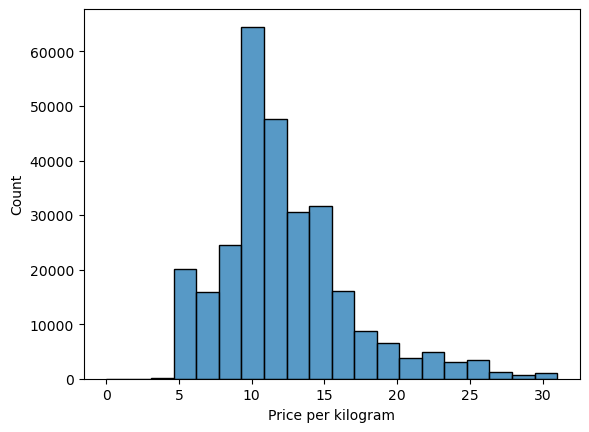

In [36]:
#Let's see the distribution.
#Veamos la distribucion.
sns.histplot(df_tortillas['Price per kilogram'], bins=20)
plt.show()

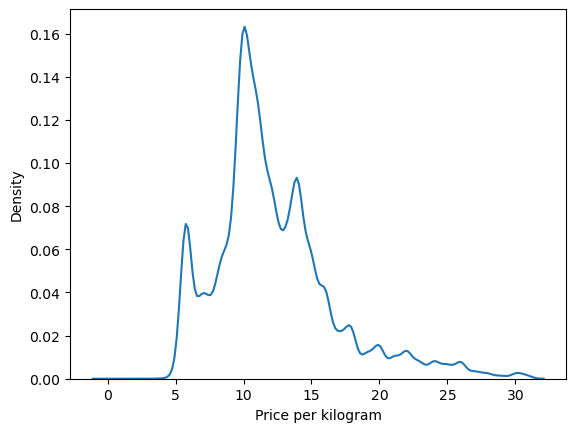

In [37]:
sns.kdeplot(df_tortillas['Price per kilogram'])
plt.show()

In [38]:
df_tortillas["Price per kilogram"].skew()

1.1924523986295992

In [39]:
df_tortillas["Price per kilogram"].kurt()

1.9368809902944224

In [40]:
#Now, let's see how many records there are for each state on a map.
#Ahora, veamos que tantos registros hay para cada estado en un mapa.
mapa = gpd.read_file('C:/Users/crist/Python/Proyectos personales/Proyecto Tortillas/Mapa Mex/gadm41_MEX_1.shp')

In [41]:
mapa.head(3)

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,MEX.1_1,MEX,México,Aguascalientes,NA,NA,Estado,State,NA,MX.AG,MX-AGU,"POLYGON ((-102.06593 21.79343, -102.06597 21.7..."
1,MEX.3_1,MEX,México,Baja California,NA,NA,Estado,State,NA,MX.BN,MX-BCN,"MULTIPOLYGON (((-114.12282 28.00795, -114.1219..."
2,MEX.2_1,MEX,México,Baja California Sur,NA,NA,Estado,State,NA,MX.BS,MX-BCS,"MULTIPOLYGON (((-109.91041 22.87950, -109.9102..."


In [42]:
#We make a DF grouped by State to merge with the Geopandas Object.
#Creamos un DF agrupado por estado para unir con el objeto de Geopandas.
conteo_estados= df_tortillas['State'].value_counts().reset_index()
conteo_estados.columns=['State','Count_Total']

In [43]:
conteo_estados.head(3)

,State,Count_Total
0,Tamaulipas,26400
1,Veracruz,18878
2,Sonora,17816


In [44]:
mapa=mapa.merge(conteo_estados, left_on='NAME_1', right_on='State', how='left')

In [45]:
mapa.head(3)

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,State,Count_Total
0,MEX.1_1,MEX,México,Aguascalientes,NA,NA,Estado,State,NA,MX.AG,MX-AGU,"POLYGON ((-102.06593 21.79343, -102.06597 21.7...",Aguascalientes,5280.0
1,MEX.3_1,MEX,México,Baja California,NA,NA,Estado,State,NA,MX.BN,MX-BCN,"MULTIPOLYGON (((-114.12282 28.00795, -114.1219...",NaN,NaN
2,MEX.2_1,MEX,México,Baja California Sur,NA,NA,Estado,State,NA,MX.BS,MX-BCS,"MULTIPOLYGON (((-109.91041 22.87950, -109.9102...",NaN,NaN


In [46]:
#Some data in the object doesn't appear
#Algunos datos en el objeto no aparecen
pd.isna(mapa['State'])

0     False
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22     True
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
Name: State, dtype: bool

In [47]:
map_dict = mapa.set_index("NAME_1")["Count_Total"].to_dict()

In [48]:
map_dict

{'Aguascalientes': 5280.0,
 'Baja California': nan,
 'Baja California Sur': nan,
 'Campeche': 5280.0,
 'Chiapas': 10560.0,
 'Chihuahua': 10560.0,
 'Coahuila': 14328.0,
 'Colima': 5280.0,
 'Distrito Federal': nan,
 'Durango': 9804.0,
 'Guanajuato': 12825.0,
 'Guerrero': 10560.0,
 'Hidalgo': 5280.0,
 'Jalisco': 10560.0,
 'México': nan,
 'Michoacán': 5280.0,
 'Morelos': 5280.0,
 'Nayarit': 5280.0,
 'Nuevo León': nan,
 'Oaxaca': 5280.0,
 'Puebla': 10103.0,
 'Querétaro': 5280.0,
 'Quintana Roo': nan,
 'San Luis Potosí': nan,
 'Sinaloa': 5280.0,
 'Sonora': 17816.0,
 'Tabasco': 5280.0,
 'Tamaulipas': 26400.0,
 'Tlaxcala': 5280.0,
 'Veracruz': 18878.0,
 'Yucatán': 5280.0,
 'Zacatecas': 5280.0}

In [49]:
map_dict = conteo_estados.set_index("State")["Count_Total"].to_dict()

In [50]:
map_dict

{'Tamaulipas': 26400,
 'Veracruz': 18878,
 'Sonora': 17816,
 'Coahuila': 14328,
 'Guanajuato': 12825,
 'Jalisco': 10560,
 'Nuevo\xa0León': 10560,
 'Baja\xa0California': 10560,
 'Chiapas': 10560,
 'Chihuahua': 10560,
 'D.F.': 10560,
 'Quintana\xa0Roo': 10560,
 'Guerrero': 10560,
 'Puebla': 10103,
 'Durango': 9804,
 'Tabasco': 5280,
 'Tlaxcala': 5280,
 'Sinaloa': 5280,
 'Yucatán': 5280,
 'San\xa0Luis\xa0Potosí': 5280,
 'Aguascalientes': 5280,
 'Morelos': 5280,
 'Querétaro': 5280,
 'Oaxaca': 5280,
 'Nayarit': 5280,
 'Michoacán': 5280,
 'Edo.\xa0México': 5280,
 'Hidalgo': 5280,
 'Colima': 5280,
 'Campeche': 5280,
 'Baja\xa0California\xa0Sur': 5280,
 'Zacatecas': 5280}

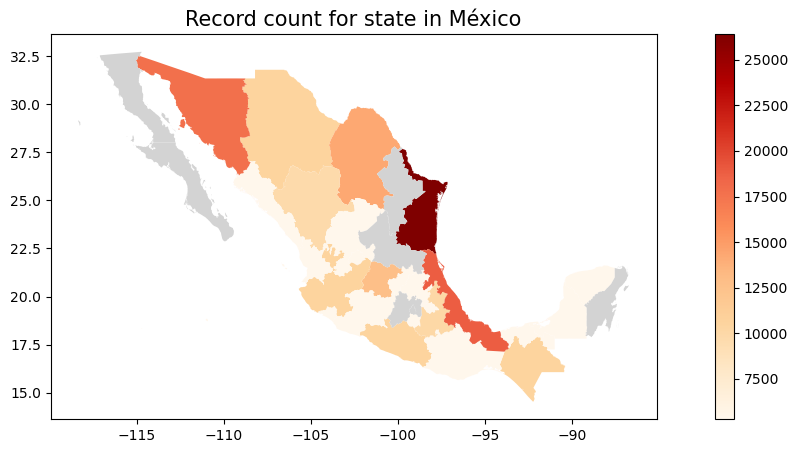

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
mapa.plot(column='Count_Total', ax=ax, legend=True, cmap="OrRd", missing_kwds={"color": "lightgrey", "label": "No data"})
plt.title("Record count for state in México", fontsize=15)
plt.show()

In [52]:
#Some states from the DF are different from the GP Object, for example, they have unbreakable spaces. This line changes that.
#Algunos estados del DF son diferentes al objeto de GP, por ejemplo, tienen espacios irrompibles, esta linea cambia eso.
conteo_estados['State'] = conteo_estados['State'].str.replace('\xa0', ' ', regex=False)

In [53]:
map_dict = conteo_estados.set_index("State")["Count_Total"].to_dict()

In [54]:
map_dict

{'Tamaulipas': 26400,
 'Veracruz': 18878,
 'Sonora': 17816,
 'Coahuila': 14328,
 'Guanajuato': 12825,
 'Jalisco': 10560,
 'Nuevo León': 10560,
 'Baja California': 10560,
 'Chiapas': 10560,
 'Chihuahua': 10560,
 'D.F.': 10560,
 'Quintana Roo': 10560,
 'Guerrero': 10560,
 'Puebla': 10103,
 'Durango': 9804,
 'Tabasco': 5280,
 'Tlaxcala': 5280,
 'Sinaloa': 5280,
 'Yucatán': 5280,
 'San Luis Potosí': 5280,
 'Aguascalientes': 5280,
 'Morelos': 5280,
 'Querétaro': 5280,
 'Oaxaca': 5280,
 'Nayarit': 5280,
 'Michoacán': 5280,
 'Edo. México': 5280,
 'Hidalgo': 5280,
 'Colima': 5280,
 'Campeche': 5280,
 'Baja California Sur': 5280,
 'Zacatecas': 5280}

In [55]:
#This line erases the spaces at the start and end of each text.
#Esta linea borra los espacios al principio y final de cada texto.
conteo_estados['State'] = conteo_estados['State'].str.strip()
mapa['NAME_1'] = mapa['NAME_1'].str.strip()

In [56]:
#This line change all text to lowercase
#Esta linea cambia todo el texto a minuscula
conteo_estados['State'] = conteo_estados['State'].str.lower()
mapa['NAME_1'] = mapa['NAME_1'].str.lower()

In [57]:
#Both DF are equal now
#Ahora ambos DF son iguales
print(mapa['NAME_1'].unique())
print(conteo_estados['State'].unique())

['aguascalientes' 'baja california' 'baja california sur' 'campeche'
 'chiapas' 'chihuahua' 'coahuila' 'colima' 'distrito federal' 'durango'
 'guanajuato' 'guerrero' 'hidalgo' 'jalisco' 'méxico' 'michoacán'
 'morelos' 'nayarit' 'nuevo león' 'oaxaca' 'puebla' 'querétaro'
 'quintana roo' 'san luis potosí' 'sinaloa' 'sonora' 'tabasco'
 'tamaulipas' 'tlaxcala' 'veracruz' 'yucatán' 'zacatecas']
['tamaulipas' 'veracruz' 'sonora' 'coahuila' 'guanajuato' 'jalisco'
 'nuevo león' 'baja california' 'chiapas' 'chihuahua' 'd.f.'
 'quintana roo' 'guerrero' 'puebla' 'durango' 'tabasco' 'tlaxcala'
 'sinaloa' 'yucatán' 'san luis potosí' 'aguascalientes' 'morelos'
 'querétaro' 'oaxaca' 'nayarit' 'michoacán' 'edo. méxico' 'hidalgo'
 'colima' 'campeche' 'baja california sur' 'zacatecas']


In [58]:
#Just change the names of the next two states to match the states in the GP object.
#Solo cambiamos los nombres de los siguientes dos estados para hacer match con los estados en el objeto de GP.
conteo_estados.loc[10, "State"] = "distrito federal"

In [59]:
conteo_estados.loc[10]

State          distrito federal
Count_Total               10560
Name: 10, dtype: object

In [60]:
conteo_estados.loc[26, 'State'] = 'méxico'

In [61]:
conteo_estados.loc[26]

State          méxico
Count_Total      5280
Name: 26, dtype: object

In [62]:
#Now it should work.
#Ahora deberia funcionar.
mapa=mapa.merge(conteo_estados, left_on='NAME_1', right_on='State', how='left')

In [63]:
mapa.head(3)

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,State_x,Count_Total_x,State_y,Count_Total_y
0,MEX.1_1,MEX,México,aguascalientes,NA,NA,Estado,State,NA,MX.AG,MX-AGU,"POLYGON ((-102.06593 21.79343, -102.06597 21.7...",Aguascalientes,5280.0,aguascalientes,5280
1,MEX.3_1,MEX,México,baja california,NA,NA,Estado,State,NA,MX.BN,MX-BCN,"MULTIPOLYGON (((-114.12282 28.00795, -114.1219...",NaN,NaN,baja california,10560
2,MEX.2_1,MEX,México,baja california sur,NA,NA,Estado,State,NA,MX.BS,MX-BCS,"MULTIPOLYGON (((-109.91041 22.87950, -109.9102...",NaN,NaN,baja california sur,5280


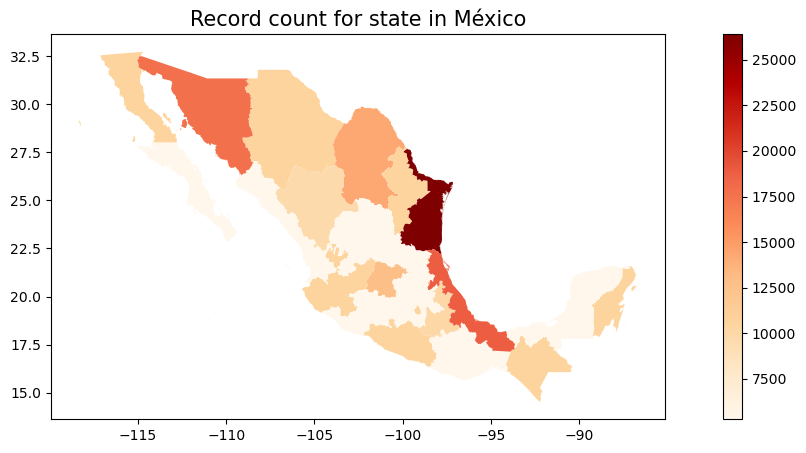

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
mapa.plot(column='Count_Total_y', ax=ax, legend=True, cmap="OrRd", missing_kwds={"color": "lightgrey", "label": "No data"})
plt.title("Record count for state in México", fontsize=15)
plt.show()

In [65]:
df_tortillas

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,10.61
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
...,...,...,...,...,...,...,...
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40


In [66]:
df_tortillas.groupby(['State', 'Year', 'Month', 'Day']).mean()

C:\Users\crist\AppData\Local\Temp\ipykernel_13872\262382897.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tortillas.groupby(['State', 'Year', 'Month', 'Day']).mean()


Price per kilogram
State          Year Month Day                    
Aguascalientes 2007 1     10                7.865
                          12                7.865
                          15                7.865
                          16                7.865
                          17                7.865
...                                           ...
Zacatecas      2024 6     28               17.765
                    7     1                17.765
                          3                17.765
                          5                17.765
                          8                17.765

[84480 rows x 1 columns]

In [67]:
df_tortillas['Date']=pd.to_datetime(df_tortillas['Year'].astype(str)+'-'+df_tortillas['Month'].astype(str)+'-'+df_tortillas['Day'].astype(str))

In [68]:
df_tortillas.groupby(['Year', 'Month']).min().Day

Year  Month
2007  1        10
      2         1
      3         1
      4         2
      5         2
               ..
2024  3         1
      4         1
      5         3
      6         3
      7         1
Name: Day, Length: 211, dtype: int64

In [69]:
df_tortillas

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90,2007-01-10
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,10.61,2007-01-10
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00,2007-01-10
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00,2007-01-10
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00,2007-01-10
...,...,...,...,...,...,...,...,...
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50,2024-07-08
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60,2024-07-08
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33,2024-07-08
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40,2024-07-08


In [70]:
df_tortillas=df_tortillas.drop(['Year','Month','Day'],axis=1)

In [71]:
df_tortillas[df_tortillas['Date']=='2007-01-13']

,State,City,Store type,Price per kilogram,Date


In [72]:
df_tortillas.groupby(['Date','State']).mean()

C:\Users\crist\AppData\Local\Temp\ipykernel_13872\1855670219.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tortillas.groupby(['Date','State']).mean()


Price per kilogram
Date       State                                  
2007-01-10 Aguascalientes                    7.865
           Baja California                   8.050
           Baja California Sur               8.050
           Campeche                          8.035
           Chiapas                           7.225
...                                            ...
2024-07-08 Tamaulipas                       21.451
           Tlaxcala                         15.150
           Veracruz                         17.975
           Yucatán                          20.630
           Zacatecas                        17.765

[84480 rows x 1 columns]

In [73]:
data_graph = df_tortillas.groupby('Date')['Price per kilogram'].mean().reset_index()
data_graph.columns=['Date', 'Average']

In [74]:
data_graph.head(3)

,Date,Average
0,2007-01-10,7.553592
1,2007-01-12,7.614854
2,2007-01-15,7.554466


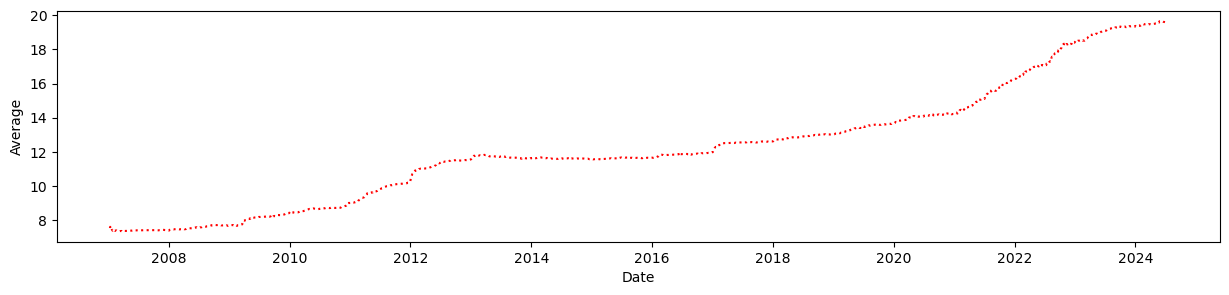

In [75]:
plt.figure(figsize=(15,3))
plt.plot(data_graph['Date'], data_graph['Average'], ls=":", color="red")
plt.xlabel("Date")
plt.ylabel("Average")
plt.show()

In [76]:
data_graph=df_tortillas.pivot_table(index='Date', values='Price per kilogram', columns='Store type', aggfunc='mean').round(2).reset_index()

In [77]:
data_graph.head(5)

Store type,Date,Big Retail Store,Mom and Pop Store
0,2007-01-10,5.70,9.30
1,2007-01-12,5.67,9.45
2,2007-01-15,5.58,9.42
3,2007-01-16,5.59,9.45
4,2007-01-17,5.61,9.48


In [78]:
data_graph['Big Retail Store'].count()

2640

In [79]:
data_graph['Mom and Pop Store'].count()

2640

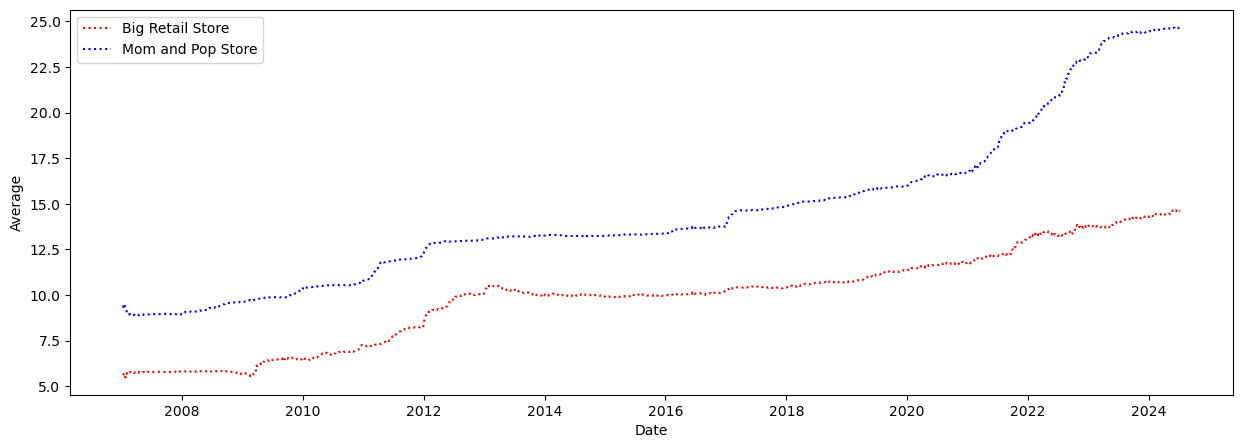

In [80]:
plt.figure(figsize=(15,5))
plt.plot(data_graph['Date'], data_graph['Big Retail Store'], ls=":", color="red", label='Big Retail Store')
plt.plot(data_graph['Date'], data_graph['Mom and Pop Store'], ls=":", color="blue", label='Mom and Pop Store')
plt.xlabel("Date")
plt.ylabel("Average")
plt.legend()
plt.show()

In [81]:
df_tortillas.groupby(['Date','State','Store type'])['Price per kilogram'].mean()

Date        State                Store type       
2007-01-10  Aguascalientes       Big Retail Store      5.830000
                                 Mom and Pop Store     9.900000
            Baja California      Big Retail Store      5.795000
                                 Mom and Pop Store    10.305000
            Baja California Sur  Big Retail Store      6.100000
                                                        ...    
2024-07-08  Veracruz             Mom and Pop Store    22.473333
            Yucatán              Big Retail Store     13.400000
                                 Mom and Pop Store    27.860000
            Zacatecas            Big Retail Store     13.530000
                                 Mom and Pop Store    22.000000
Name: Price per kilogram, Length: 168960, dtype: float64

In [82]:
df_tortillas.head(1)

,State,City,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,Mom and Pop Store,9.9,2007-01-10


In [83]:
dftortillas=df_tortillas.groupby(['Date','State','Store type'])['Price per kilogram'].mean().round(2).reset_index()

In [84]:
dftortillas

,Date,State,Store type,Price per kilogram
0,2007-01-10,Aguascalientes,Big Retail Store,5.83
1,2007-01-10,Aguascalientes,Mom and Pop Store,9.90
2,2007-01-10,Baja California,Big Retail Store,5.80
3,2007-01-10,Baja California,Mom and Pop Store,10.30
4,2007-01-10,Baja California Sur,Big Retail Store,6.10
...,...,...,...,...
168955,2024-07-08,Veracruz,Mom and Pop Store,22.47
168956,2024-07-08,Yucatán,Big Retail Store,13.40
168957,2024-07-08,Yucatán,Mom and Pop Store,27.86
168958,2024-07-08,Zacatecas,Big Retail Store,13.53


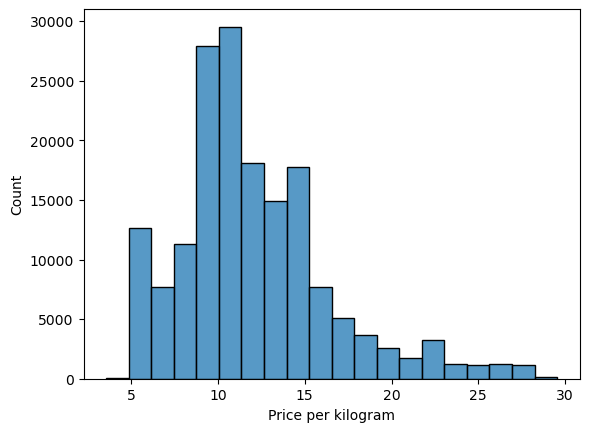

In [85]:
sns.histplot(dftortillas['Price per kilogram'], bins=20)
plt.show()

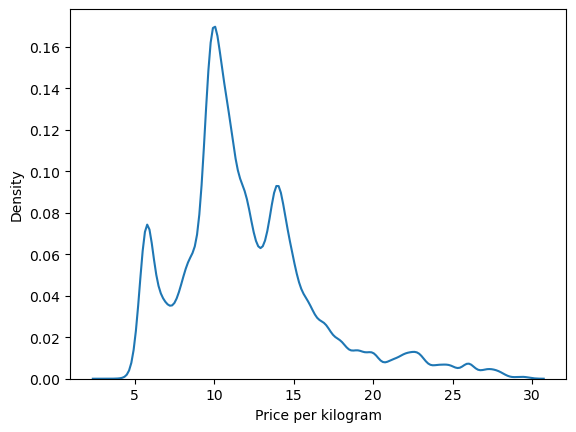

In [86]:
sns.kdeplot(dftortillas['Price per kilogram'])
plt.show()

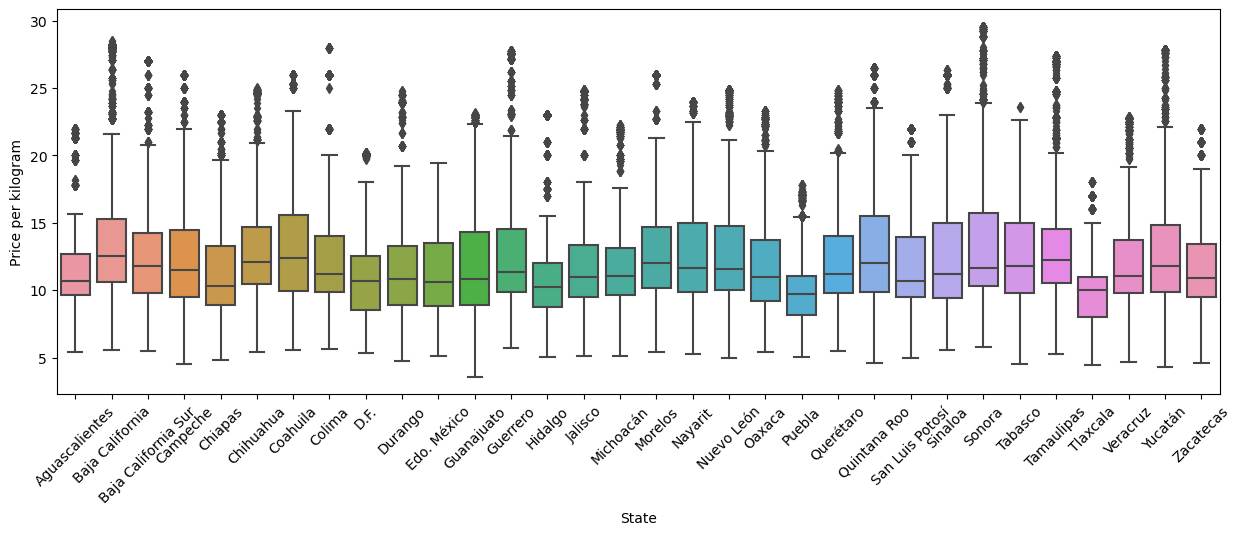

In [87]:
plt.figure(figsize=(15,5))
sns.boxplot(x='State',y='Price per kilogram',data=dftortillas)
plt.xticks(rotation=45)
plt.show()

In [88]:
dftortillas['Price per kilogram'].value_counts()

10.00    4182
14.00    3333
12.00    2670
5.80     2368
15.00    2102
         ... 
19.12       1
20.34       1
28.06       1
20.44       1
19.26       1
Name: Price per kilogram, Length: 1661, dtype: int64

In [89]:
dftortillas[dftortillas['Price per kilogram'].isna()]

,Date,State,Store type,Price per kilogram


In [90]:
import pandas as pd
Q1 = dftortillas['Price per kilogram'].quantile(0.25)
Q3 = dftortillas['Price per kilogram'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = dftortillas[(dftortillas['Price per kilogram'] < lower_limit) | (dftortillas['Price per kilogram'] > upper_limit)]
print(outliers)

             Date       State         Store type  Price per kilogram
128371 2020-04-03      Sonora  Mom and Pop Store               21.17
128435 2020-04-06      Sonora  Mom and Pop Store               21.17
128499 2020-04-08      Sonora  Mom and Pop Store               21.33
128563 2020-04-13      Sonora  Mom and Pop Store               21.33
128627 2020-04-15      Sonora  Mom and Pop Store               21.33
...           ...         ...                ...                 ...
168949 2024-07-08     Tabasco  Mom and Pop Store               23.60
168951 2024-07-08  Tamaulipas  Mom and Pop Store               27.37
168955 2024-07-08    Veracruz  Mom and Pop Store               22.47
168957 2024-07-08     Yucatán  Mom and Pop Store               27.86
168959 2024-07-08   Zacatecas  Mom and Pop Store               22.00

[9734 rows x 4 columns]


In [91]:
data=dftortillas

In [92]:
data.head(5)

,Date,State,Store type,Price per kilogram
0,2007-01-10,Aguascalientes,Big Retail Store,5.83
1,2007-01-10,Aguascalientes,Mom and Pop Store,9.90
2,2007-01-10,Baja California,Big Retail Store,5.80
3,2007-01-10,Baja California,Mom and Pop Store,10.30
4,2007-01-10,Baja California Sur,Big Retail Store,6.10


In [93]:
data['Year']=data['Date'].dt.strftime('%Y')

In [94]:
data.head(5)

,Date,State,Store type,Price per kilogram,Year
0,2007-01-10,Aguascalientes,Big Retail Store,5.83,2007
1,2007-01-10,Aguascalientes,Mom and Pop Store,9.90,2007
2,2007-01-10,Baja California,Big Retail Store,5.80,2007
3,2007-01-10,Baja California,Mom and Pop Store,10.30,2007
4,2007-01-10,Baja California Sur,Big Retail Store,6.10,2007


In [95]:
years=data.groupby('Year').agg({'Price per kilogram':'count'})

In [96]:
years.max()

Price per kilogram    10176
dtype: int64

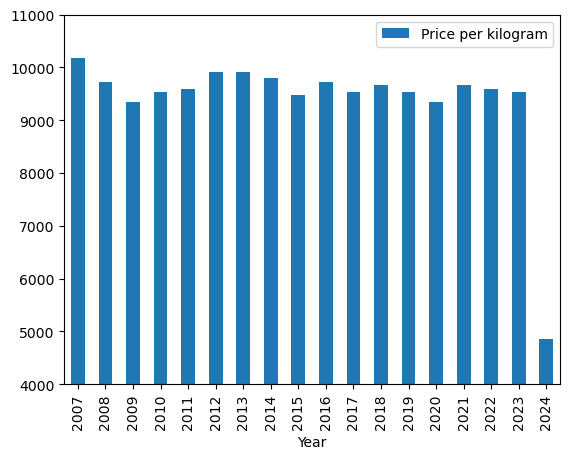

In [97]:
years.plot.bar(ylim=(4000,11000))
plt.show()

In [98]:
max_prices = data.groupby('Year')['Price per kilogram'].max().reset_index()

In [99]:
max_prices['Year'].unique()

array(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'], dtype=object)

In [100]:
max_prices['Year'] = max_prices['Year'].astype(int)

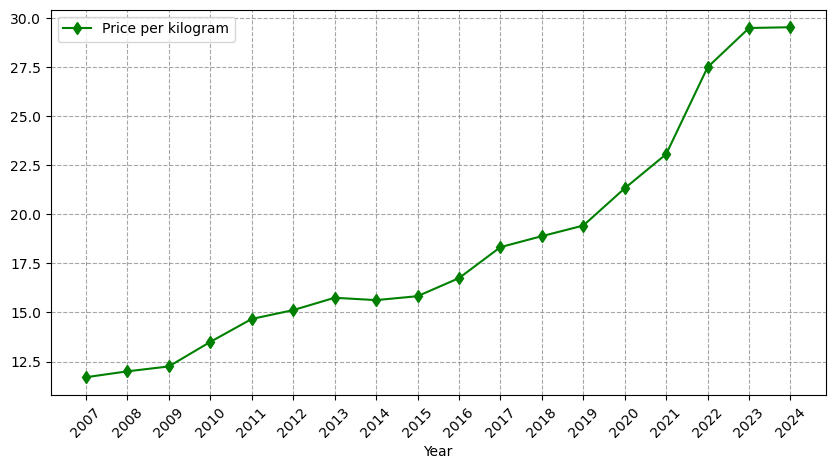

In [101]:
fig, ax=plt.subplots(figsize=(10,5))
max_prices.plot(x='Year', marker='d', color='green', ax=ax)
ax.grid(True, linestyle='--', color='gray', alpha=0.7)
ax.set_xticks(max_prices['Year'])
plt.xticks(rotation=45)
plt.show()

In [102]:
years.max()

Price per kilogram    10176
dtype: int64

In [103]:
dftortillas

,Date,State,Store type,Price per kilogram,Year
0,2007-01-10,Aguascalientes,Big Retail Store,5.83,2007
1,2007-01-10,Aguascalientes,Mom and Pop Store,9.90,2007
2,2007-01-10,Baja California,Big Retail Store,5.80,2007
3,2007-01-10,Baja California,Mom and Pop Store,10.30,2007
4,2007-01-10,Baja California Sur,Big Retail Store,6.10,2007
...,...,...,...,...,...
168955,2024-07-08,Veracruz,Mom and Pop Store,22.47,2024
168956,2024-07-08,Yucatán,Big Retail Store,13.40,2024
168957,2024-07-08,Yucatán,Mom and Pop Store,27.86,2024
168958,2024-07-08,Zacatecas,Big Retail Store,13.53,2024


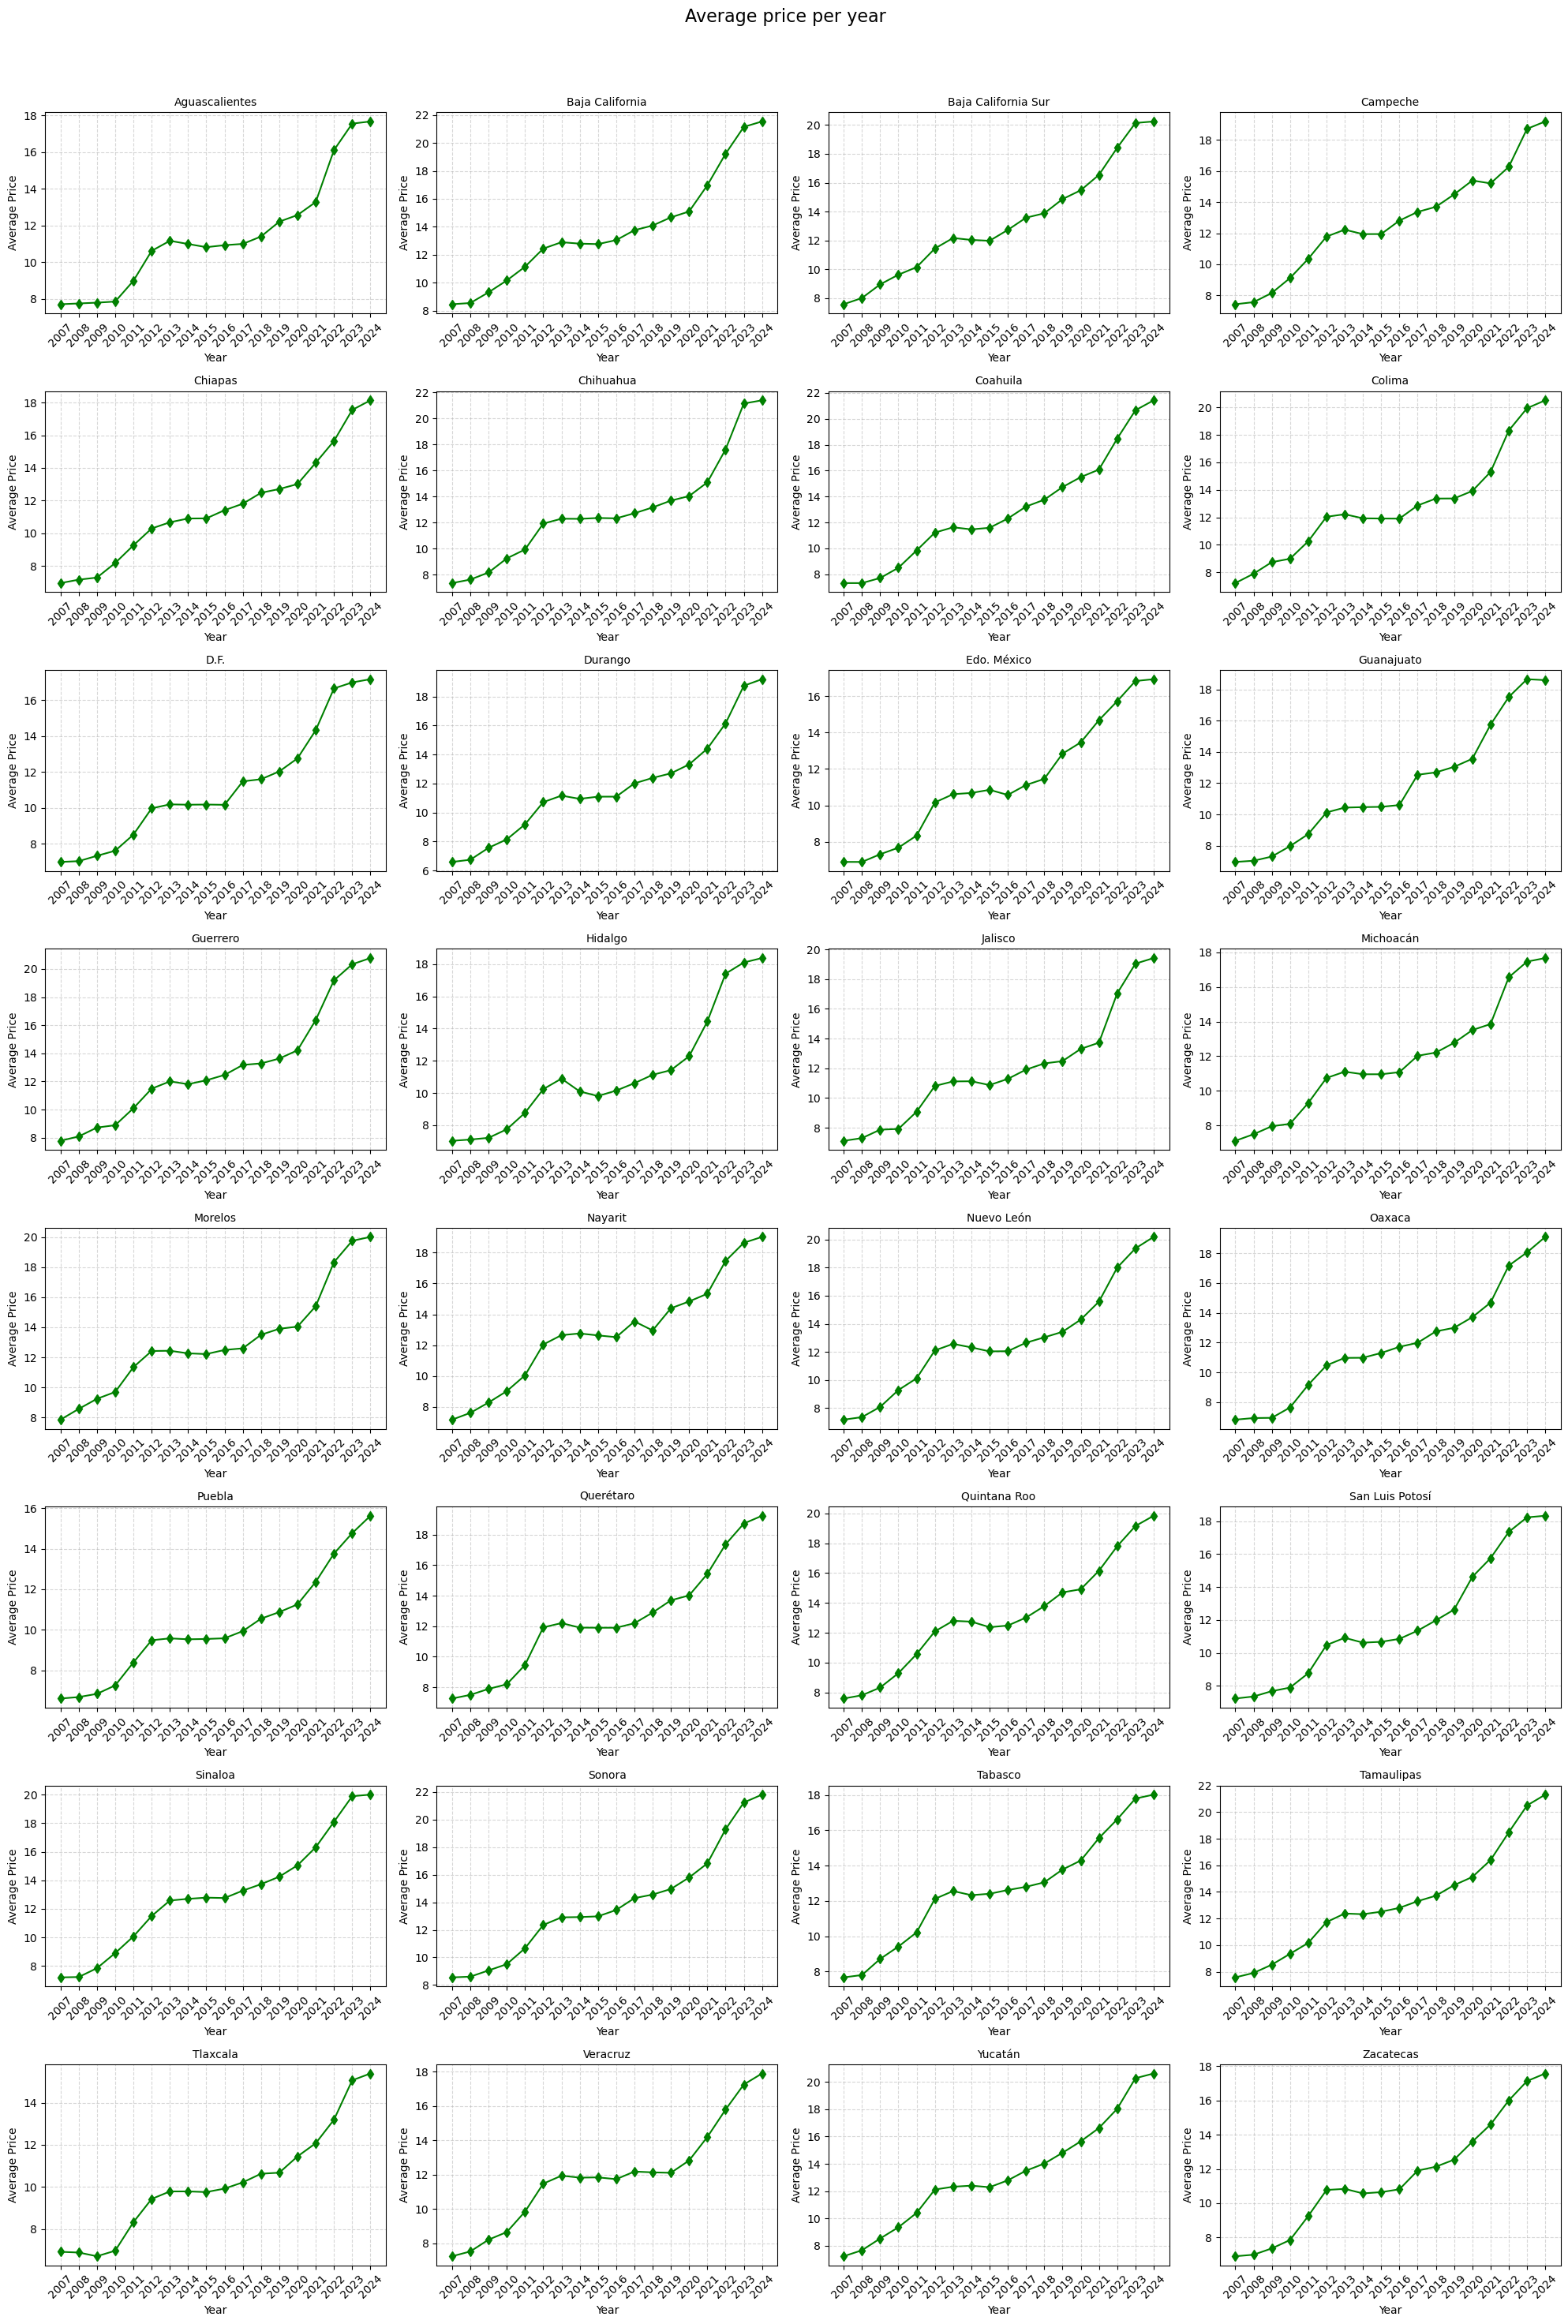

In [104]:
#Realizar un dataframe con promedios agrupados por estado y año
average_price = data.groupby(['State', 'Year'])['Price per kilogram'].mean().reset_index()
#Lista con los estados existentes del dataframe
states = average_price['State'].unique()
#Establecer los parametros para dibujar el subplot mas adelante
num_rows = 8
num_cols = 4
#Figura base para dibujar los subplots y titulo
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
fig.suptitle('Average price per year', fontsize=16)

for i, state in enumerate(states):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    state_data = average_price[average_price['State'] == state]
    ax.plot(state_data['Year'], state_data['Price per kilogram'], marker='d', color='green')
    ax.set_title(state, fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Price')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(state_data['Year'])
    ax.tick_params(axis='x', rotation=45)
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
fig.savefig('Average_Prices_per_State.png')